## Maze Creation and Solving

This notebook first creates a maze on a grid. Then a bot is created to solve the maze. The solution is optimized by eliminating all steps that are between the first and the last visit of each field. Multiple solutions are being created, but there is no guarantee for an optimal solution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy


### Creating the maze

In [3]:
# Define the start and finish coordinates
START = 0 #default
FINISH = 25
pitch = []

# Dictionary to translate numbers to letters
NL = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 
      13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# List for the positions of the individual fields of the maze
position_list = []

# Dictionaries for translations
hor = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
ver = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [4]:
# Create initial pitch (square field with a fixed start and fixed finish)
for i in range(FINISH):
    for j in range(FINISH):
        if i == START:
            if j == FINISH-1:
                pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 1, 'u': 1, 'r': 0, 'd': 0, 'walls': 2}
            else:
                pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 1, 'u': 0, 'r': 0, 'd': 0, 'walls': 1}
        elif i == FINISH-1:
            if j == START:
                pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 1, 'd': 1, 'walls': 2}
            else:
                pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 1, 'd': 0, 'walls': 1}
        else:
            if j == START:
                pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 0, 'd': 1, 'walls': 1}
            elif j == FINISH-1:
                pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 1, 'r': 0, 'd': 0, 'walls': 1}
            else:
                pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 0, 'd': 0, 'walls': 0}    
        
        pitch.append(pos)
        
        # Create list for positions
        position_list.append(NL[i]+str(j))
        
# Define start and finish position
start = {'position': ver[0]+str(-1), 'name': 'Start', 'x': 0.5, 'y': -0.5, 'l': 1, 'u': 0, 'r': 1, 'd': 1, 'walls': 3}
finish = {'position': ver[FINISH-1]+hor[FINISH], 'name': 'Finish', 'x': FINISH-0.5, 'y': FINISH+0.5, 'l': 1, 'u': 1, 'r': 1, 'd': 0, 'walls': 3}

# Add start and finish position to the pitch
pitch.append(start)
pitch.append(finish)


In [5]:
# Add walls to the pitch by going through each field
for h in range(len(pitch)):
    
    pos = pitch[h]
    
    # A wall can only be inserted if a field has less than two walls
    if pos['walls'] < 2:
    
        # potential walls for a field
        position = []
        if pos['l'] == 0:
            position.append('l')
        if pos['u'] == 0:
            position.append('u')
        if pos['r'] == 0:
            position.append('r')
        if pos['d'] == 0:
            position.append('d')

        if pos['position'] == position_list[0]:
            position.remove('d')
        if pos['position'] == position_list[-1]:
            position.remove('u')
        
        # Make sure to not put 3 walls around one field
        if len(position) > 2:
            choice = random.choice(position)
            
            if choice == 'u':
                # Neighbor of the field
                neighbor = pos['position'][0] + hor[np.where(np.array(hor) == pos['position'][1:])[0][0]+1]

                # Check if a wall can be inserted, i.e., field and neighbor have only one wall at max
                if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['d'] = 1
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                    pos[choice] = 1
                    pos['walls'] += 1

            if choice == 'd':
                neighbor = pos['position'][0] + hor[np.where(np.array(hor) == pos['position'][1:])[0][0]-1]            

                if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['u'] = 1
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                    pos[choice] = 1
                    pos['walls'] += 1

            if choice == 'r':
                neighbor = ver[np.where(np.array(ver) == pos['position'][0])[0][0]+1] + pos['position'][1:]

                if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['l'] = 1
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                    pos[choice] = 1
                    pos['walls'] += 1
                      
            if choice == 'l':
                neighbor = ver[np.where(np.array(ver) == pos['position'][0])[0][0]-1] + pos['position'][1:]

                if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['r'] = 1
                    pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                    pos[choice] = 1
                    pos['walls'] += 1


In [6]:
# Make a copy of the pitch
pitch_copy = copy.deepcopy(pitch)


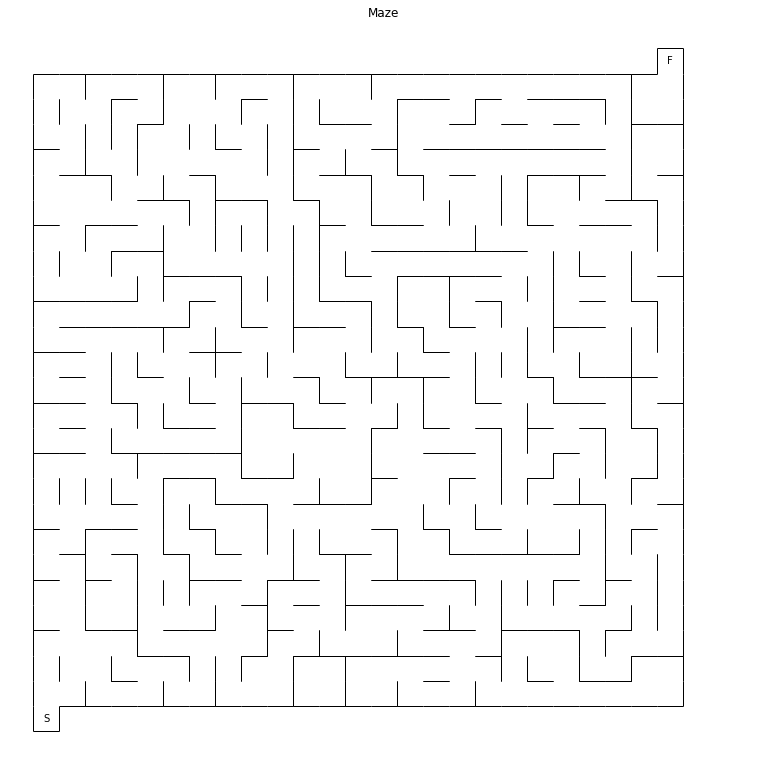

In [7]:
# Plot the pitch
fig,ax = plt.subplots(figsize=((FINISH+2)/2,(FINISH+2)/2))

plt.title('Maze')

plt.xlim(-1,FINISH+3)
plt.ylim(-2,FINISH+2)

plt.axis('off')

for i in range(len(pitch)):
    try:
        if pitch[i]['name'] == 'Start':
            ax.annotate('S', xy=(pitch[i]['x']-0.1,pitch[i]['y']-0.1), color='black', fontsize=10)
        if pitch[i]['name'] == 'Finish':
            ax.annotate('F', xy=(pitch[i]['x']-0.1,pitch[i]['y']-0.1), color='black', fontsize=10)        
    except KeyError: 
        pass

    if pitch[i]['l'] == 1:
        plt.vlines(x=pitch[i]['x']-0.5, ymin=pitch[i]['y']-0.5, ymax=pitch[i]['y']+0.5, linewidth=1, color='black')
    if pitch[i]['r'] == 1:
        plt.vlines(x=pitch[i]['x']+0.5, ymin=pitch[i]['y']-0.5, ymax=pitch[i]['y']+0.5, linewidth=1, color='black')
    if pitch[i]['d'] == 1:
        plt.hlines(y=pitch[i]['y']-0.5, xmin=pitch[i]['x']-0.5, xmax=pitch[i]['x']+0.5, linewidth=1, color='black') 
    if pitch[i]['u'] == 1:
        plt.hlines(y=pitch[i]['y']+0.5, xmin=pitch[i]['x']-0.5, xmax=pitch[i]['x']+0.5, linewidth=1, color='black') 
    

In [8]:
# Add start and finish to list of positions
position_list.append(ver[0]+str(-1))
position_list.append(ver[FINISH-1]+hor[FINISH])


### Check if every position on the pitch is reachable

In [9]:
REACHABLE = ['A-1']

for i in range(len(pitch)):
    
    try:

        position = REACHABLE[i]

        if pitch[np.where(np.array(position_list) == position)[0][0]]['u'] == 0:
            new_position = pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0] + str(int(pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:])+1)
            if new_position not in REACHABLE:
                REACHABLE.append(new_position)

        if pitch[np.where(np.array(position_list) == position)[0][0]]['d'] == 0:
            new_position = pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0] + str(int(pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:])-1)
            if new_position not in REACHABLE:
                REACHABLE.append(new_position)

        if pitch[np.where(np.array(position_list) == position)[0][0]]['l'] == 0:
            new_position = ver[np.where(np.array(ver) == pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0])[0][0]-1] + pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:]
            if new_position not in REACHABLE:
                REACHABLE.append(new_position)

        if pitch[np.where(np.array(position_list) == position)[0][0]]['r'] == 0:
            new_position = ver[np.where(np.array(ver) == pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0])[0][0]+1] + pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:]
            if new_position not in REACHABLE:
                REACHABLE.append(new_position)

    except IndexError:
        pass


Create new pitch
Create new pitch
Create new pitch
Create new pitch
Create new pitch
Create new pitch
Create new pitch
Create new pitch


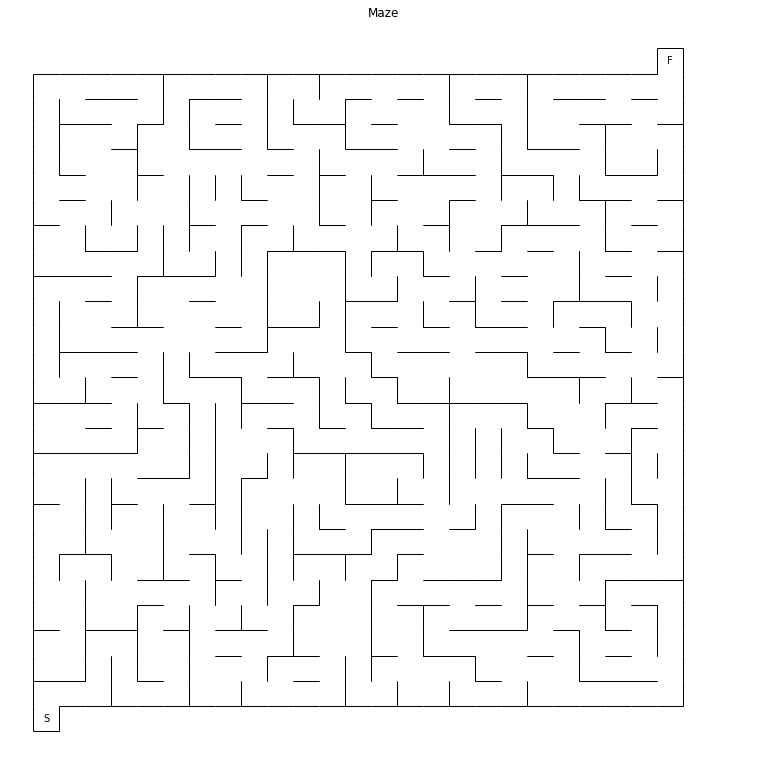

In [10]:
while len(REACHABLE) < len(pitch):
    print('Create new pitch')
    
    # Re-initiate the pitch
    pitch = []
    
    # List for the positions of the individual fields of the maze
    position_list = []

    # Create initial pitch (square field with a fixed start and fixed finish)
    for i in range(FINISH):
        for j in range(FINISH):
            if i == START:
                if j == FINISH-1:
                    pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 1, 'u': 1, 'r': 0, 'd': 0, 'walls': 2}
                else:
                    pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 1, 'u': 0, 'r': 0, 'd': 0, 'walls': 1}
            elif i == FINISH-1:
                if j == START:
                    pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 1, 'd': 1, 'walls': 2}
                else:
                    pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 1, 'd': 0, 'walls': 1}
            else:
                if j == START:
                    pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 0, 'd': 1, 'walls': 1}
                elif j == FINISH-1:
                    pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 1, 'r': 0, 'd': 0, 'walls': 1}
                else:
                    pos = {'position': NL[i]+str(j), 'x': i + 0.5, 'y': j + 0.5, 'l': 0, 'u': 0, 'r': 0, 'd': 0, 'walls': 0}    

            pitch.append(pos)

            # Create list for positions
            position_list.append(NL[i]+str(j))

    # Define start and finish position
    start = {'position': ver[0]+str(-1), 'name': 'Start', 'x': 0.5, 'y': -0.5, 'l': 1, 'u': 0, 'r': 1, 'd': 1, 'walls': 3}
    finish = {'position': ver[FINISH-1]+hor[FINISH], 'name': 'Finish', 'x': FINISH-0.5, 'y': FINISH+0.5, 'l': 1, 'u': 1, 'r': 1, 'd': 0, 'walls': 3}

    # Add start and finish position to the pitch
    pitch.append(start)
    pitch.append(finish)
    
    # Add walls to the pitch by going through each field
    for h in range(len(pitch)):

        pos = pitch[h]

        # A wall can only be inserted if a field has less than two walls
        if pos['walls'] < 2:

            # potential walls for a field
            position = []
            if pos['l'] == 0:
                position.append('l')
            if pos['u'] == 0:
                position.append('u')
            if pos['r'] == 0:
                position.append('r')
            if pos['d'] == 0:
                position.append('d')

            if pos['position'] == position_list[0]:
                position.remove('d')
            if pos['position'] == position_list[-1]:
                position.remove('u')

            # Make sure to not put 3 walls around one field
            if len(position) > 2:
                choice = random.choice(position)

                if choice == 'u':
                    # Neighbor of the field
                    neighbor = pos['position'][0] + hor[np.where(np.array(hor) == pos['position'][1:])[0][0]+1]

                    # Check if a wall can be inserted, i.e., field and neighbor have only one wall at max
                    if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['d'] = 1
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                        pos[choice] = 1
                        pos['walls'] += 1

                if choice == 'd':
                    neighbor = pos['position'][0] + hor[np.where(np.array(hor) == pos['position'][1:])[0][0]-1]            

                    if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['u'] = 1
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                        pos[choice] = 1
                        pos['walls'] += 1

                if choice == 'r':
                    neighbor = ver[np.where(np.array(ver) == pos['position'][0])[0][0]+1] + pos['position'][1:]

                    if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['l'] = 1
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                        pos[choice] = 1
                        pos['walls'] += 1

                if choice == 'l':
                    neighbor = ver[np.where(np.array(ver) == pos['position'][0])[0][0]-1] + pos['position'][1:]

                    if pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] < 2:
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['r'] = 1
                        pitch[np.where(np.array(position_list) == neighbor)[0][0]]['walls'] += 1

                        pos[choice] = 1
                        pos['walls'] += 1
                        
    # Make a copy of the pitch
    pitch_copy = copy.deepcopy(pitch)
    
    # Add start and finish to list of positions
    position_list.append(ver[0]+str(-1))
    position_list.append(ver[FINISH-1]+hor[FINISH])
    
    REACHABLE = ['A-1']

    for i in range(len(pitch)):

        try:
            position = REACHABLE[i]

            if pitch[np.where(np.array(position_list) == position)[0][0]]['u'] == 0:
                new_position = pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0] + str(int(pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:])+1)
                if new_position not in REACHABLE:
                    REACHABLE.append(new_position)

            if pitch[np.where(np.array(position_list) == position)[0][0]]['d'] == 0:
                new_position = pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0] + str(int(pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:])-1)
                if new_position not in REACHABLE:
                    REACHABLE.append(new_position)

            if pitch[np.where(np.array(position_list) == position)[0][0]]['l'] == 0:
                new_position = ver[np.where(np.array(ver) == pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0])[0][0]-1] + pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:]
                if new_position not in REACHABLE:
                    REACHABLE.append(new_position)

            if pitch[np.where(np.array(position_list) == position)[0][0]]['r'] == 0:
                new_position = ver[np.where(np.array(ver) == pitch[np.where(np.array(position_list) == position)[0][0]]['position'][0])[0][0]+1] + pitch[np.where(np.array(position_list) == position)[0][0]]['position'][1:]
                if new_position not in REACHABLE:
                    REACHABLE.append(new_position)

        except IndexError:
            pass

    
# Plot the pitch
fig,ax = plt.subplots(figsize=((FINISH+2)/2,(FINISH+2)/2))

plt.title('Maze')

plt.xlim(-1,FINISH+3)
plt.ylim(-2,FINISH+2)

plt.axis('off')

for i in range(len(pitch)):
    try:
        if pitch[i]['name'] == 'Start':
            ax.annotate('S', xy=(pitch[i]['x']-0.1,pitch[i]['y']-0.1), color='black', fontsize=10)
        if pitch[i]['name'] == 'Finish':
            ax.annotate('F', xy=(pitch[i]['x']-0.1,pitch[i]['y']-0.1), color='black', fontsize=10)        
    except KeyError: 
        pass

    if pitch[i]['l'] == 1:
        plt.vlines(x=pitch[i]['x']-0.5, ymin=pitch[i]['y']-0.5, ymax=pitch[i]['y']+0.5, linewidth=1, color='black')
    if pitch[i]['r'] == 1:
        plt.vlines(x=pitch[i]['x']+0.5, ymin=pitch[i]['y']-0.5, ymax=pitch[i]['y']+0.5, linewidth=1, color='black')
    if pitch[i]['d'] == 1:
        plt.hlines(y=pitch[i]['y']-0.5, xmin=pitch[i]['x']-0.5, xmax=pitch[i]['x']+0.5, linewidth=1, color='black') 
    if pitch[i]['u'] == 1:
        plt.hlines(y=pitch[i]['y']+0.5, xmin=pitch[i]['x']-0.5, xmax=pitch[i]['x']+0.5, linewidth=1, color='black')


### Solving the maze

In [11]:
# Add start and finish to list of positions
position_list.append(ver[0]+str(-1))
position_list.append(ver[FINISH-1]+hor[FINISH])


In [12]:
BEST_len = np.inf
TRIES = 100

for tries in range(TRIES):

    # Start position
    current_position = position_list[-2]

    # Define the bot
    bot = {'position': current_position}

    # Steps the bot undertakes
    bot_run = []
    bot_run.append(current_position)

    # Directions the bot took
    directions = []

    # Total number of iterations
    iterations = 0

    # Shortest solution
    BEST = np.inf

    # Loop until bot reaches finish
    while ((bot['position'] != position_list[-1]) and (len(bot_run) <= BEST)):
        h = np.where(np.array(position_list) == bot['position'])[0][0]

        pos = pitch_copy[h]
        position = []
        if pos['l'] == 0:
            position.append('l')
        if pos['u'] == 0:
            position.append('u')
        if pos['r'] == 0:
            position.append('r')
        if pos['d'] == 0:
            position.append('d')

        if iterations > 0 and new_position != ver[0]+str(-1):

            # Prevent back-and-forth moves
            if directions[iterations-1] == 'u':
                try:
                    position.remove('d')
                except ValueError:
                    pass

            if directions[iterations-1] == 'd':
                try:
                    position.remove('u')
                except ValueError:
                    pass

            if directions[iterations-1] == 'r':
                try:
                    position.remove('l')
                except ValueError:
                    pass

            if directions[iterations-1] == 'l':
                try:
                    position.remove('r')
                except ValueError:
                    pass

        choice = random.choice(position)
        directions.append(choice)

        if choice == 'u':
            new_position = pos['position'][0] + str(int(pos['position'][1:])+1)

        if choice == 'd':
            new_position = pos['position'][0] + str(int(pos['position'][1:])-1)

        if choice == 'l':
            new_position = ver[np.where(np.array(ver) == pos['position'][0])[0][0]-1] + pos['position'][1:]

        if choice == 'r':
            new_position = ver[np.where(np.array(ver) == pos['position'][0])[0][0]+1] + pos['position'][1:]

        bot_run.append(new_position)
        bot['position'] = new_position
        iterations += 1

    if len(bot_run) <= BEST:
        BEST = len(bot_run)
        SOLUTION = bot_run

        #print('Maze solved in {} steps initially.'.format(len(bot_run)))

    # Optimize the inital solution
    # Eliminate all fields that were visited between the first time a field was visited and the last time a field was visited

    for position in position_list:

        try:
            # First time on a field
            FIRST = np.where(np.array(bot_run) == position)[0][0]

            # Last time on a field
            LAST = np.where(np.array(bot_run) == position)[0][-1]

            if FIRST != LAST:
                bot_run = bot_run[:FIRST] + bot_run[LAST:]

            if len(bot_run) < BEST:
                BEST = len(bot_run)
                SOLUTION = bot_run

        except IndexError:
            pass

    #print('Maze solved in {} steps optimized.'.format(len(bot_run)))

    if BEST < BEST_len:
        BEST_solution = SOLUTION
        BEST_len = len(BEST_solution)
        
print('Maze solved in {} steps.'.format(BEST_len))


Maze solved in 73 steps.


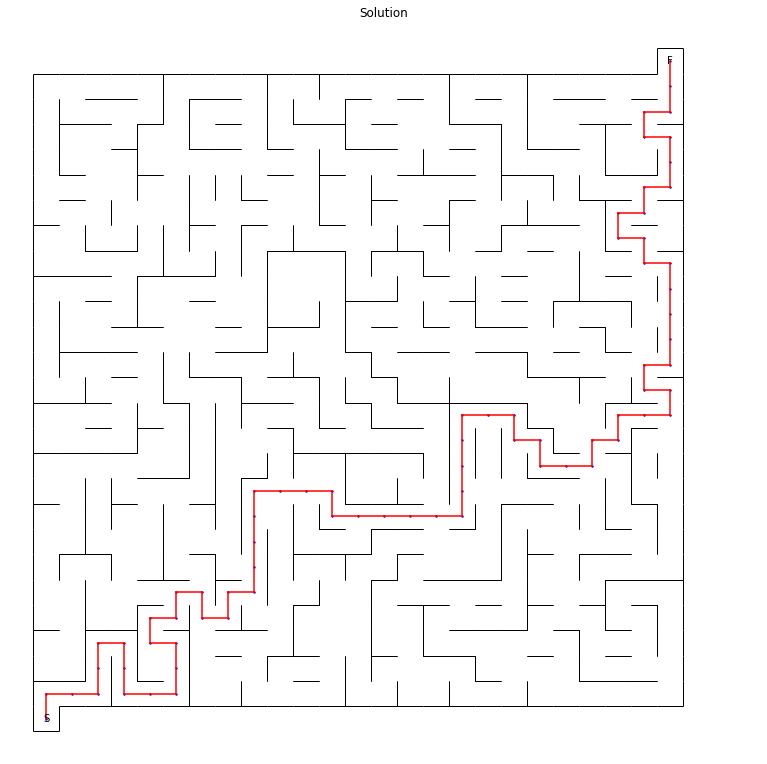

In [13]:
# Plot the pitch and solution
fig,ax = plt.subplots(figsize=((FINISH+2)/2,(FINISH+2)/2))

plt.title('Solution')

plt.xlim(-1,FINISH+3)
plt.ylim(-2,FINISH+2)

plt.axis('off')

for i in range(len(pitch)):
    try:
        if pitch[i]['name'] == 'Start':
            ax.annotate('S', xy=(pitch[i]['x']-0.1,pitch[i]['y']-0.1), color='black', fontsize=10)
        if pitch[i]['name'] == 'Finish':
            ax.annotate('F', xy=(pitch[i]['x']-0.1,pitch[i]['y']-0.1), color='black', fontsize=10)        
    except KeyError: 
        pass

    if pitch[i]['l'] == 1:
        plt.vlines(x=pitch[i]['x']-0.5, ymin=pitch[i]['y']-0.5, ymax=pitch[i]['y']+0.5, linewidth=1, color='black')
    if pitch[i]['r'] == 1:
        plt.vlines(x=pitch[i]['x']+0.5, ymin=pitch[i]['y']-0.5, ymax=pitch[i]['y']+0.5, linewidth=1, color='black')
    if pitch[i]['d'] == 1:
        plt.hlines(y=pitch[i]['y']-0.5, xmin=pitch[i]['x']-0.5, xmax=pitch[i]['x']+0.5, linewidth=1, color='black') 
    if pitch[i]['u'] == 1:
        plt.hlines(y=pitch[i]['y']+0.5, xmin=pitch[i]['x']-0.5, xmax=pitch[i]['x']+0.5, linewidth=1, color='black') 
        
# Fields the bot visited
for i in range(len(BEST_solution)):
    plt.scatter(pitch[np.where(np.array(position_list) == BEST_solution[i])[0][0]]['x'],
                pitch[np.where(np.array(position_list) == BEST_solution[i])[0][0]]['y'],
                color = 'blue', s=2)

# Steps the bot took
for i in range(len(BEST_solution)-1):
    plt.plot((pitch[np.where(np.array(position_list) == BEST_solution[i])[0][0]]['x'],
              pitch[np.where(np.array(position_list) == BEST_solution[i+1])[0][0]]['x']),
             (pitch[np.where(np.array(position_list) == BEST_solution[i])[0][0]]['y'],
              pitch[np.where(np.array(position_list) == BEST_solution[i+1])[0][0]]['y']),
             color='red')
    